In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df=pd.read_excel(r"C:\Users\Cellphone\Downloads\drc_subnational_covid19_hera.xlsx")
df.head()

,ID,DATE,ISO_3,PAYS,ID_PAYS,REGION,ID_REGION,CONTAMINES,DECES,GUERIS,CONTAMINES_FEMME,CONTAMINES_HOMME,CONTAMINES_GENRE_NON_SPECIFIE,NOUVEAUX_INDIVIDUS_VACCINES (1 dose),TOTAL_INDIVIDUS_VACCINES (1 dose),NOUVEAUX_INDIVIDUS_VACCINES (2 doses),TOTAL_INDIVIDUS_VACCINES (2 doses),SOURCE
0,1,2020-09-19,COD,République Démocratique du Congo,17.0,Bas Uele,222,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,OMS RDC
1,2,2020-09-19,COD,République Démocratique du Congo,17.0,Equateur,223,15,0.0,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,OMS RDC
2,3,2020-09-19,COD,République Démocratique du Congo,17.0,Haut Katanga,224,325,0.0,NaN,NaN,NaN,325.0,NaN,NaN,NaN,NaN,OMS RDC
3,4,2020-09-19,COD,République Démocratique du Congo,17.0,Haut Lomami,225,1,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,OMS RDC
4,5,2020-09-19,COD,République Démocratique du Congo,17.0,Haut Uele,226,63,0.0,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,OMS RDC


In [61]:
df.isnull().sum()

ID                                          0
DATE                                        0
ISO_3                                    3213
PAYS                                     3213
ID_PAYS                                  3213
REGION                                      0
ID_REGION                                   0
CONTAMINES                                  0
DECES                                     902
GUERIS                                    850
CONTAMINES_FEMME                         1512
CONTAMINES_HOMME                         1512
CONTAMINES_GENRE_NON_SPECIFIE              16
NOUVEAUX_INDIVIDUS_VACCINES (1 dose)     7883
TOTAL_INDIVIDUS_VACCINES (1 dose)        7884
NOUVEAUX_INDIVIDUS_VACCINES (2 doses)    7884
TOTAL_INDIVIDUS_VACCINES (2 doses)       8127
SOURCE                                      0
dtype: int64

In [62]:
# Suppression des colonnes de vaccnation (trop de valeurs manquantes)
colonnes_a_supprimer=['NOUVEAUX_INDIVIDUS_VACCINES (1 dose)','TOTAL_INDIVIDUS_VACCINES (1 dose)',
                     'NOUVEAUX_INDIVIDUS_VACCINES (2 doses)','TOTAL_INDIVIDUS_VACCINES (2 doses)']
df.drop(columns=colonnes_a_supprimer,inplace=True)

# Remplir les colonnes numériques avec 0 là où c'est vide
colonnes_a_remplir= ['DECES','GUERIS','CONTAMINES_FEMME','CONTAMINES_HOMME','CONTAMINES_GENRE_NON_SPECIFIE']
df[colonnes_a_remplir] = df[colonnes_a_remplir].fillna(df[colonnes_a_remplir].mean())

# Remplir les colonnes IS0_3,PAYS,ID_PAYS avec des valeurs fixes
df['ISO_3'] = df['ISO_3'].fillna('COD')
df['PAYS'] = df['PAYS'].fillna('RDC')
df['ID_PAYS'] = df['ID_PAYS'].fillna(180)

# Vérification finale du nettoyage
print("Valeurs manquantes restantes : ")
print(df.isnull().sum())

Valeurs manquantes restantes : 
ID                               0
DATE                             0
ISO_3                            0
PAYS                             0
ID_PAYS                          0
REGION                           0
ID_REGION                        0
CONTAMINES                       0
DECES                            0
GUERIS                           0
CONTAMINES_FEMME                 0
CONTAMINES_HOMME                 0
CONTAMINES_GENRE_NON_SPECIFIE    0
SOURCE                           0
dtype: int64


In [63]:
# maintenant passons à l'analyse exploratoire(EDA)
# Nombre de lignes et colonnes; types de données; Valeurs manquantes restantes(au cas où)
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())

(9072, 14)
ID                                        int64
DATE                             datetime64[ns]
ISO_3                                    object
PAYS                                     object
ID_PAYS                                 float64
REGION                                   object
ID_REGION                                 int64
CONTAMINES                                int64
DECES                                   float64
GUERIS                                  float64
CONTAMINES_FEMME                        float64
CONTAMINES_HOMME                        float64
CONTAMINES_GENRE_NON_SPECIFIE           float64
SOURCE                                   object
dtype: object
ID                               0
DATE                             0
ISO_3                            0
PAYS                             0
ID_PAYS                          0
REGION                           0
ID_REGION                        0
CONTAMINES                       0
DECES                  

In [64]:
# Statistiques globales
df.describe()

,ID,DATE,ID_PAYS,ID_REGION,CONTAMINES,DECES,GUERIS,CONTAMINES_FEMME,CONTAMINES_HOMME,CONTAMINES_GENRE_NON_SPECIFIE
count,9072.000000,9072,9072.000000,9072.00000,9072.000000,9072.000000,9072.000000,9072.0,9072.0,9072.000000
mean,4536.500000,2021-03-05 12:00:09.523809536,74.729167,235.00000,5.953373,0.128886,3.753588,0.0,0.0,5.948322
min,1.000000,2020-09-19 00:00:00,17.000000,222.00000,-6.000000,-1.000000,-42.000000,0.0,0.0,-6.000000
25%,2268.750000,2020-12-11 18:00:00,17.000000,228.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,4536.500000,2021-03-05 12:00:00,17.000000,235.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,6804.250000,2021-05-28 06:00:00,180.000000,242.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,9072.000000,2021-08-20 00:00:00,180.000000,248.00000,8108.000000,271.000000,9930.000000,0.0,0.0,8108.000000
std,2619.005155,NaN,77.960679,7.78931,89.224555,3.555027,108.349453,0.0,0.0,89.223420


In [69]:
# Taux utiles à calculer
df['TAUX_MORTALITE']= (df['DECES']/df['CONTAMINES'])*100
df['TAUX_GUERISON']=(df['GUERIS']/df['CONTAMINES'])*100
df.head()

,ID,DATE,ISO_3,PAYS,ID_PAYS,REGION,ID_REGION,CONTAMINES,DECES,GUERIS,CONTAMINES_FEMME,CONTAMINES_HOMME,CONTAMINES_GENRE_NON_SPECIFIE,SOURCE,TAUX_MORTALITE,TAUX_GUERISON
0,1,2020-09-19,COD,République Démocratique du Congo,17.0,Bas Uele,222,0,0.0,0.000000,0.0,0.0,0.0,OMS RDC,NaN,NaN
1,2,2020-09-19,COD,République Démocratique du Congo,17.0,Equateur,223,15,0.0,3.753588,0.0,0.0,15.0,OMS RDC,0.0,25.023920
2,3,2020-09-19,COD,République Démocratique du Congo,17.0,Haut Katanga,224,325,0.0,3.753588,0.0,0.0,325.0,OMS RDC,0.0,1.154950
3,4,2020-09-19,COD,République Démocratique du Congo,17.0,Haut Lomami,225,1,0.0,3.753588,0.0,0.0,1.0,OMS RDC,0.0,375.358793
4,5,2020-09-19,COD,République Démocratique du Congo,17.0,Haut Uele,226,63,0.0,3.753588,0.0,0.0,63.0,OMS RDC,0.0,5.958076


In [74]:
# Les dix régions les plus touchées en RDC
region = df.groupby('REGION')['CONTAMINES'].sum().sort_values(ascending=False).reset_index().head(10)
region

,REGION,CONTAMINES
0,Kinshasa,33656
1,Nord Kivu,5684
2,Haut Katanga,3881
3,Kongo Central,2843
4,Lualaba,2094
5,Sud Kivu,1895
6,Ituri,1062
7,Tshopo,881
8,Haut Uele,584
9,Non spécifié,496


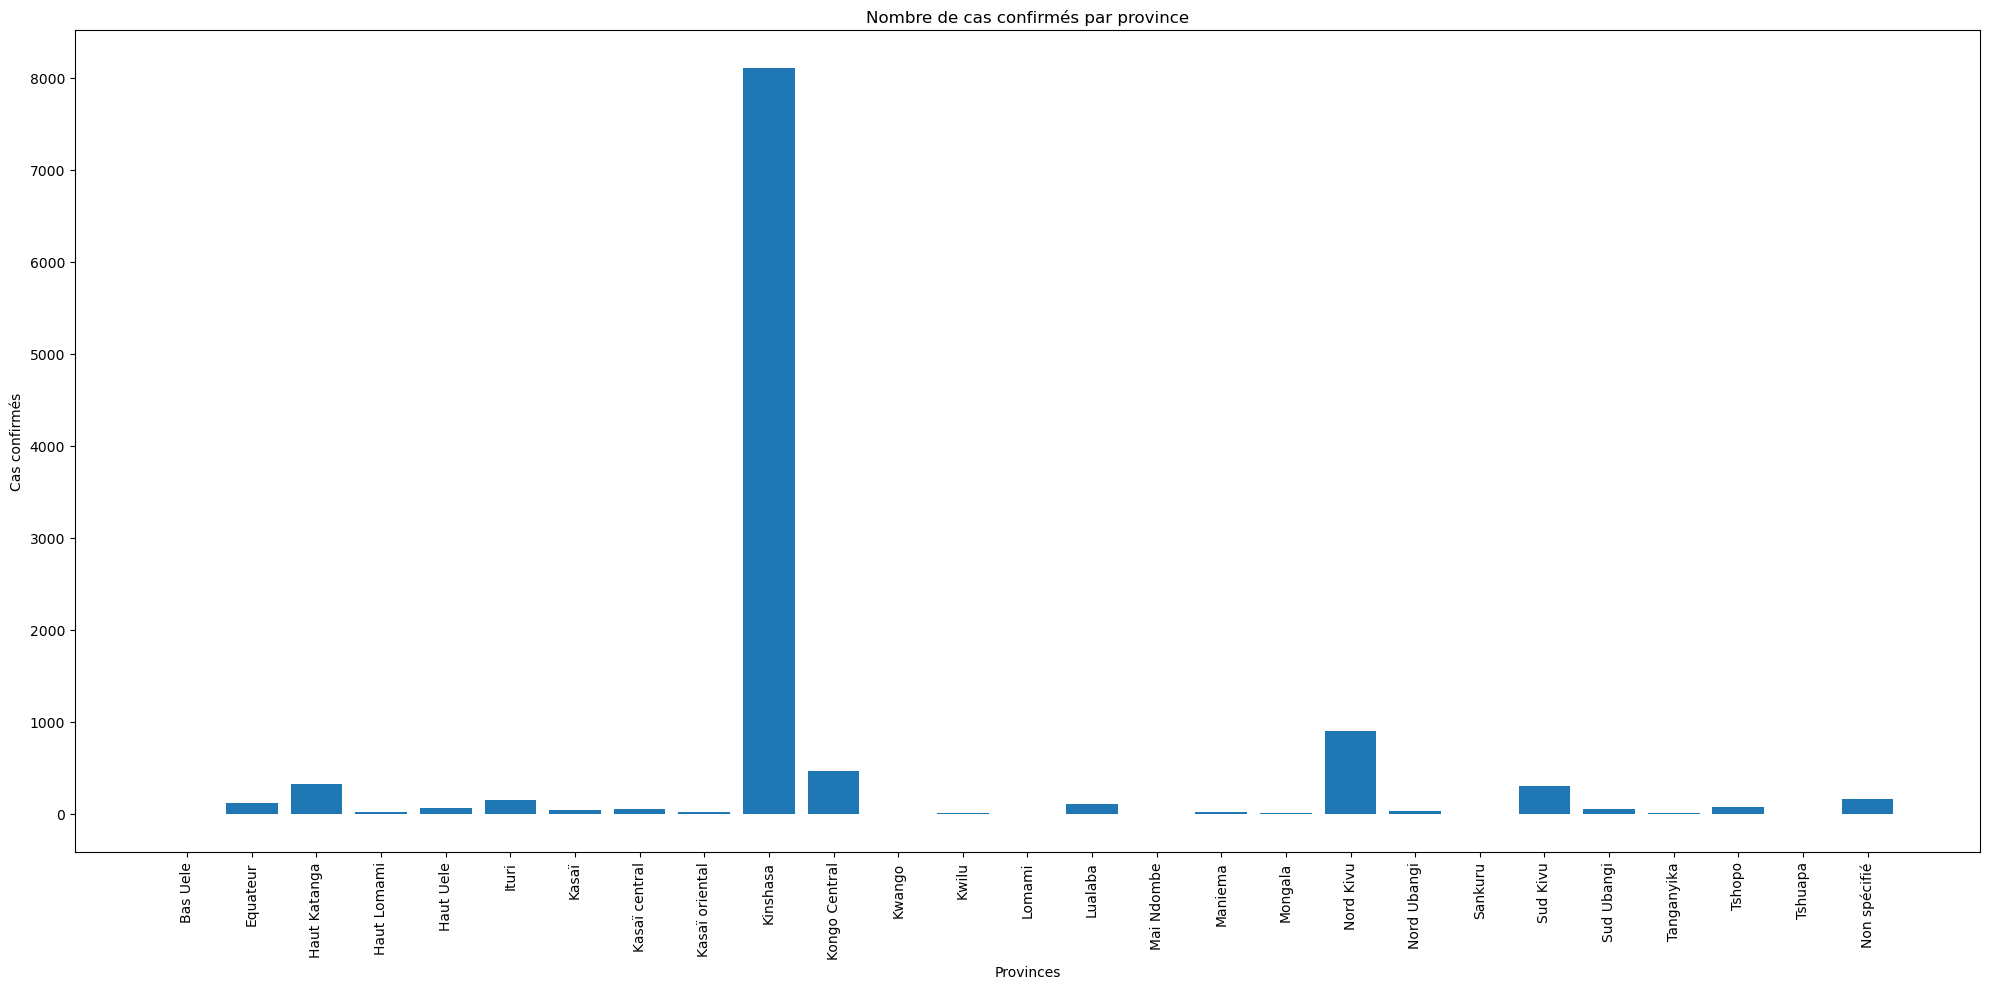

In [85]:
# Visualisation avec Matplotlib 
# Bar chart des cas par province
%mat
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(df['REGION'],df['CONTAMINES'])
plt.xticks(rotation=90)
plt.title('Nombre de cas confirmés par province')
plt.xlabel('Provinces')
plt.ylabel('Cas confirmés')
plt.tight_layout()
plt.show()

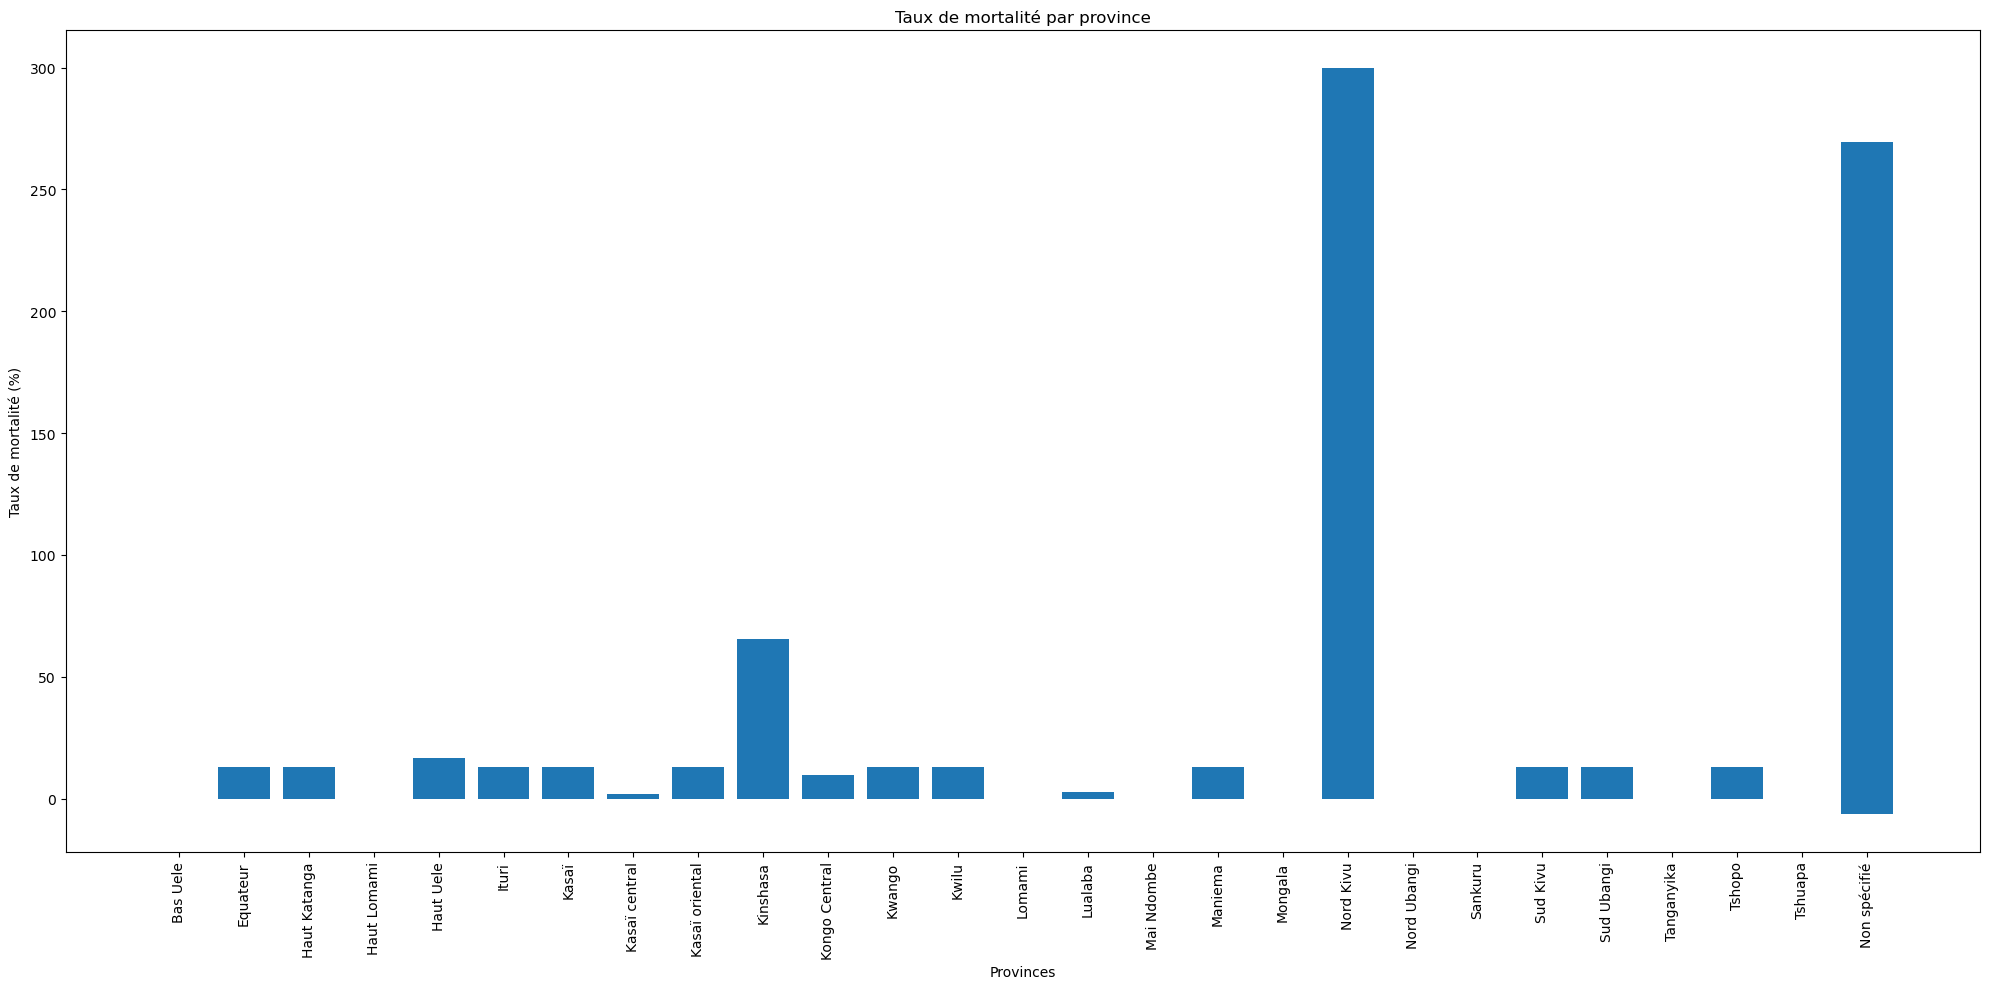

In [86]:
# Taux de mortalité par province
plt.figure(figsize=(20,10))
plt.bar(df['REGION'],df['TAUX_MORTALITE'])
plt.xticks(rotation=90)
plt.title('Taux de mortalité par province')
plt.xlabel('Provinces')
plt.ylabel('Taux de mortalité (%)')
plt.tight_layout()
plt.show()

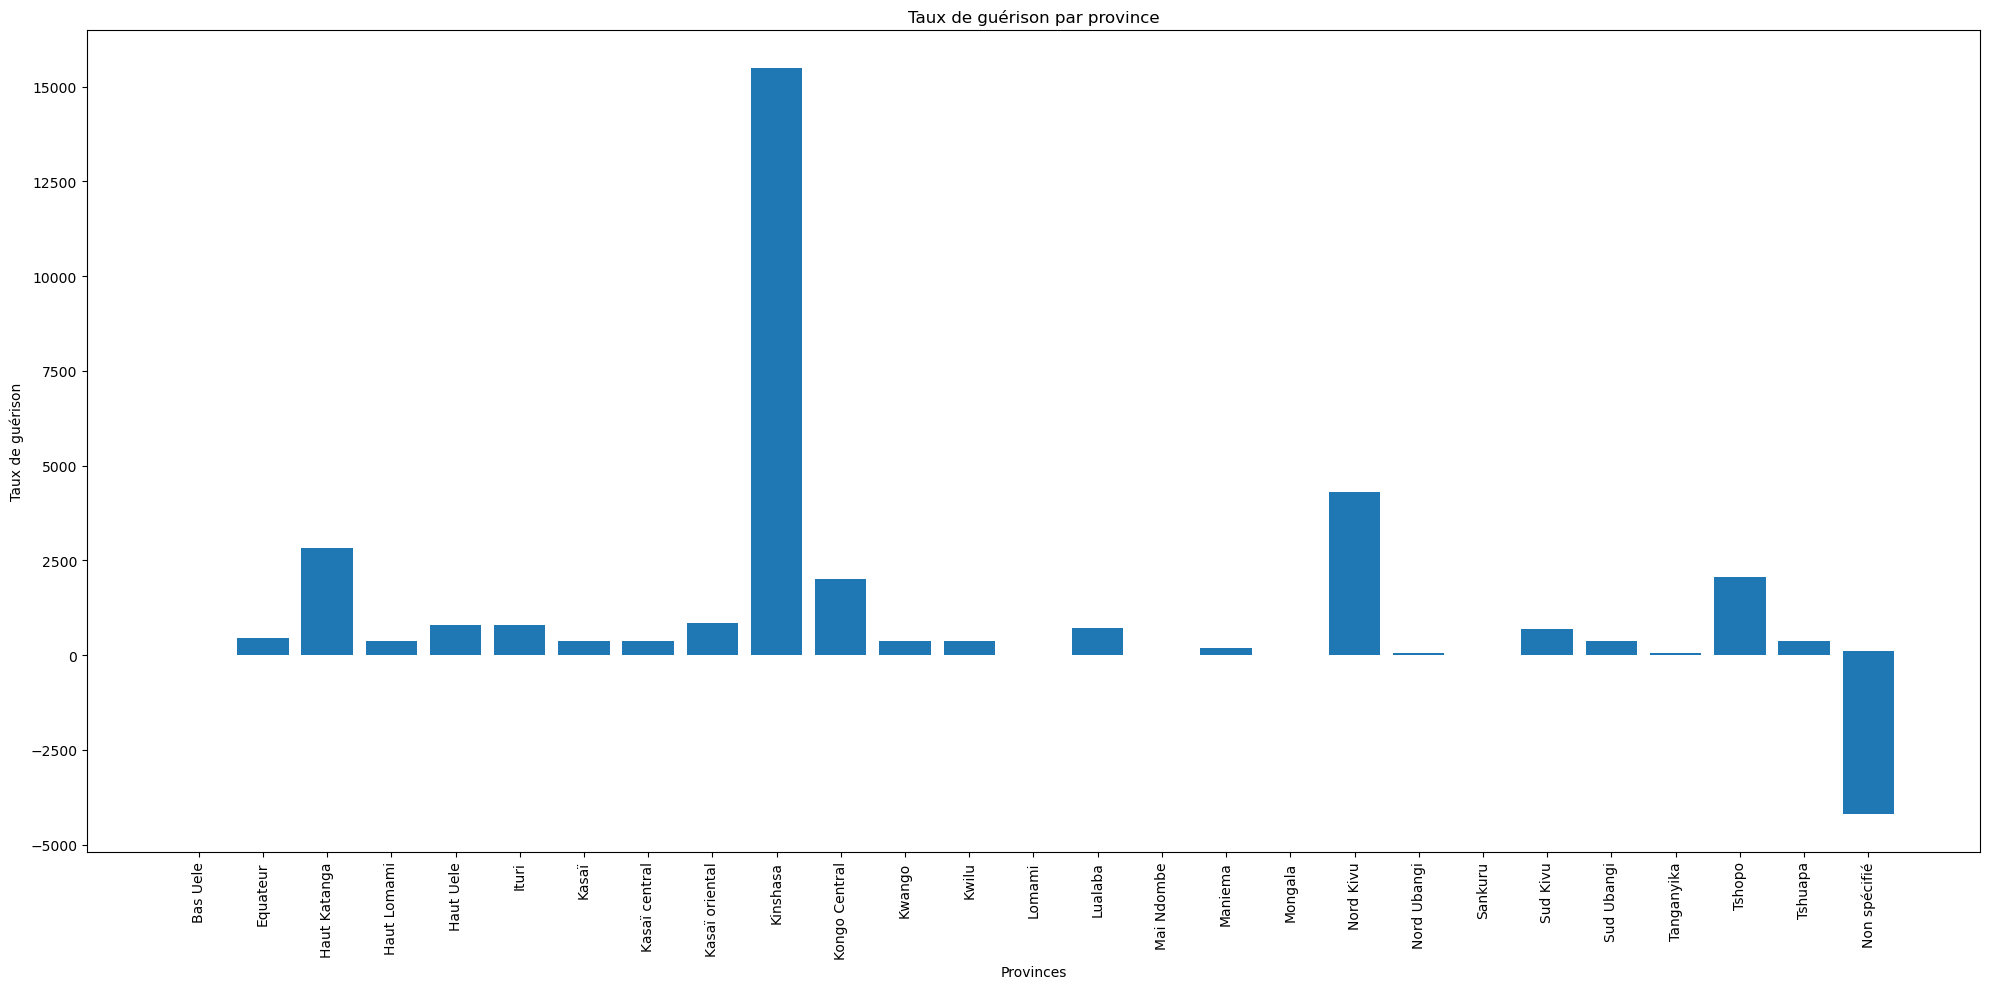

In [87]:
# Taux de guerison par province
plt.figure(figsize=(20,10))
plt.bar(df['REGION'],df['TAUX_GUERISON'])
plt.xticks(rotation=90)
plt.title('Taux de guérison par province')
plt.xlabel('Provinces')
plt.ylabel('Taux de guérison')
plt.tight_layout()
plt.show()